<a href="https://colab.research.google.com/github/mark3000-010701/Dataanalyst/blob/main/Th%E1%BB%B1c_h%C3%A0nh_ki%E1%BB%83m_%C4%91%E1%BB%8Bnh_gi%E1%BA%A3_thuy%E1%BA%BFt_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[Thực hành] Phân tích dữ liệu trên bộ dữ liệu FoodPrice in Turkey**

Với mức ý nghĩa 5% hay kiểm định giả thuyết: giá bán lẻ gạo trung bình năm 2019 là 9.5 (Lira)/1 kg Turkish Lira là đơn vị tiền tệ ở Turkey (1usd ~ 8-9 Lira)

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://s3.ap-southeast-1.amazonaws.com/learn.codegym.vn/media/public/2021/12/31021019/FoodPrice_in_Turkey.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place        7381 non-null   object 
 1   ProductId    7381 non-null   int64  
 2   ProductName  7381 non-null   object 
 3   UmId         7381 non-null   int64  
 4   UmName       7381 non-null   object 
 5   Month        7381 non-null   int64  
 6   Year         7381 non-null   int64  
 7   Price        7381 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 461.4+ KB


1. với mức ý nghĩa 5% kiểm định giả thuyết giá bán gạo trung bình năm 2019 là 10 Lira/kg

In [3]:
#liệt kê tên các sản phẩm
product_names = list(df['ProductName'].unique()) 
print(product_names)

['Rice - Retail', 'Wheat flour - Retail', 'Beans (white) - Retail', 'Potatoes - Retail', 'Eggs - Retail', 'Meat (chicken) - Retail', 'Sugar - Retail', 'Garlic - Retail', 'Lentils - Retail', 'Pasta - Retail', 'Tomatoes - Retail', 'Groundnuts (shelled) - Retail', 'Bread (common) - Retail', 'Coffee - Retail', 'Onions - Retail', 'Tea (green) - Retail', 'Cabbage - Retail', 'Meat (mutton) - Retail', 'Oil (sunflower) - Retail', 'Salt - Retail', 'Coffee (instant) - Retail', 'Peas (green, dry) - Retail', 'Apples (red) - Retail', 'Cauliflower - Retail', 'Cucumbers (greenhouse) - Retail', 'Oil (olive) - Retail', 'Chickpeas - Retail', 'Bananas - Retail', 'Bulgur - Retail', 'Tea - Retail', 'Fuel (petrol-gasoline) - Retail', 'Transport (public) - Retail', 'Tomatoes (paste) - Retail', 'Fuel (gas) - Retail', 'Apples - Retail', 'Oranges - Retail', 'Yogurt - Retail', 'Bread (pita) - Retail', 'Cucumbers - Retail', 'Fish (fresh) - Retail', 'Spinach - Retail', 'Cheese - Retail', 'Meat (veal) - Retail', 'Eg

In [4]:
# Lọc những bản ghi liên quan tới giá gạo năm 2019
df_rice = df.loc[(df.ProductName== 'Rice - Retail') & (df.Year == 2019)]
print ('Số lượng bản ghi của gạo năm 2019: ' +str(df_rice.shape[0])) 

Số lượng bản ghi của gạo năm 2019: 48


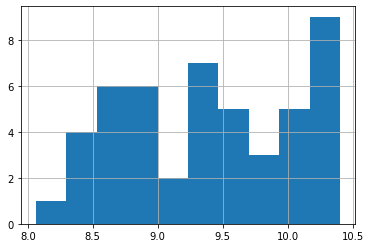

In [7]:
df_rice.Price.hist()

Do phân bố có xu hướng gần giống phân bố chuẩn, nên lựa chọn thực hiện kiểm định 2 phía với one sample T test

Giả thuyết không: Giá gạo trung bình = 9.5

Giả thuyết đối: Giá gạo trung bình # 9.5

In [8]:
print( stats.ttest_1samp(df_rice.Price, 9.5))

Ttest_1sampResult(statistic=-1.1854023812590566, pvalue=0.24181730968913567)


Giá trị pvalue >5% nên không đủ cơ sở để để bác bỏ giả thuyết không

Kết luận: Với mức ý nghĩa 5% có thể nhận định giá gạo trung bình bằng 9.5 Lira/kg

# 2. Với mức ý nghĩa 5% hãy kiểm định giả thuyết: Giá bột mỳ và giá gạo ở Turkey năm 2019 là bằng nhau

Số lượng bản ghi của bột mỳ năm 2019: 48


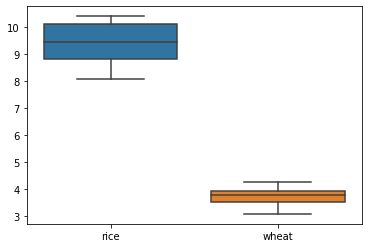

In [9]:
# lấy thông tin bột mỳ năm 2019
df_wheat = df.loc[(df.ProductName== 'Wheat flour - Retail') & (df.Year == 2019)]
print ('Số lượng bản ghi của bột mỳ năm 2019: '+str(df_wheat.shape[0])) 
import seaborn as sns
# Tạo boxplot so sánh phân bố của bột mỳ vào gao
price = {'rice': list(df_rice["Price"]), 'wheat': list(df_wheat['Price'])}
df_price = pd.DataFrame(price)
sns.boxplot(data=df_price)
plt.show()

Nhìn vào phân bố trên chúng ta cũng có thể kết luận được luôn, giá của bột mì thấp hơn hẳn giá của gạo. Để chứng minh nhận định rằng giá bột mỳ và giá gạo không giống nhau, chúng ta thực hiện so sánh trung bình độc lập – independent T test Giả thuyết không: giá bột mỳ trung bình bằng giá gạo Giả thuyết đối: giá bột mỳ trung bình khác giá gạo

In [10]:
print(stats.ttest_ind(price['rice'], price['wheat'], equal_var=False))


Ttest_indResult(statistic=53.7516920363042, pvalue=7.11046528586048e-55)


Chúng ta có thể thấy Pvalue = 7.1.10^-55 <<5%, bác bỏ giả thuyết không, chấp nhận giả thuyết đối

Kết luận: giá bột mỳ và giá gạo trung bình năm 2019 là khác nhau

# 3. Vẽ biểu đồ sự biến đổi giá gạo trung bình từ năm 1/2014 đến năm 1/2019 và tìm mối liên hệ giữa giá Trà và giá Cà phê

In [11]:
# xóa những biến không cần thiết
del (df_rice, df_price, df_wheat, price)

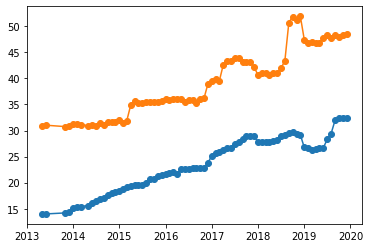

In [12]:
# chuyển đổi dữ liệu ngày tháng
df['time'] =  pd.to_datetime(df['Year'].astype(str) + '/'+df['Month'].astype(str))
# thực hiện tính toán và vẽ giá trà, caffe theo tháng
df_Tea_all = df.loc[(df.ProductName == 'Tea - Retail')]
df_Tea_all_mean_by_month = df_Tea_all.groupby('time')['Price'].mean()
plt.plot_date(df_Tea_all_mean_by_month.index, df_Tea_all_mean_by_month.values, linestyle ='solid')

df_Coffee_all = df.loc[(df.ProductName == 'Coffee - Retail')]
df_Coffee_all_mean_by_month = df_Coffee_all.groupby('time')['Price'].mean()
plt.plot_date(df_Coffee_all_mean_by_month.index, df_Coffee_all_mean_by_month.values, linestyle ='solid')

In [13]:
# Tiền xử lý dữ liệu
# Tạo một data frame thông tin gồm chứa time - place, giá trà, giá cafe
df_tea_and_coffee = df.loc[(df.ProductName.isin(['Tea - Retail','Coffee - Retail']))]

df_tea_and_coffee['time-place'] = df_tea_and_coffee['time'].astype(str) +'-'+df_tea_and_coffee['Place']
df1 = df_tea_and_coffee[df_tea_and_coffee.ProductName =='Tea - Retail'].filter(['time-place',  'Price'])
df1 = df1.rename(columns = {'Price':'Tea - Retail'})

df2 = df_tea_and_coffee[df_tea_and_coffee.ProductName =='Coffee - Retail'].filter(['time-place', 'Price'])
df2 = df2.rename(columns = {'Price':'Coffee - Retail'})

Processed_data = pd.merge(df1, df2, on = 'time-place')
Processed_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,time-place,Tea - Retail,Coffee - Retail
0,2013-05-01-National Average,14.0201,30.8937
1,2013-06-01-National Average,14.0003,31.0164
2,2013-11-01-National Average,14.1921,30.7445
3,2013-12-01-National Average,14.3991,30.9079
4,2014-01-01-National Average,15.2072,31.2607


Tiến hành kiểm định: Thực hiện kiểm định wilcoxon 1 phía với giả thuyết như sau:<br>
Giả thuyết không: giá cà phê bằng giá trà công thêm 15 Lira ở mọi thời điểm<br>

Giả thuyết đối: Giá giá cà phê luôn hơn giá trà 15 Lira ở mọi thời điểm


In [14]:
# thực hiện biến đổi dữ liệu
d = Processed_data['Coffee - Retail']-Processed_data['Tea - Retail'] - 15
# Thực hiện kiểm định wilcolxon
from scipy import stats
# thực hiện kiểm định với giả thuyết đối được định nghĩa ở trên
stats.wilcoxon(d, alternative='greater')

WilcoxonResult(statistic=9838.0, pvalue=0.0004122034397612688)

### Do pvalue <1% rất nhiều –> Bác bỏ giả thuyết không, chấp nhận giả thuyết đối Giá Cà phê luôn lớn hơn giá trà ít nhất 15 lira mà không bị ảnh hưởng bởi thời gian hay địa điểm

# **[Thực hành] phân tích dữ liệu trên bộ dữ liệu Quản lý chất lượng**

In [15]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [16]:
df = pd.read_excel('https://s3.ap-southeast-1.amazonaws.com/learn.codegym.vn/media/public/2022/03/06085738/Quality.xlsx')
print(df.head())
df.info()

   Sample 1  Sample 2  Sample 3  Sample 4
0     11.55     11.62     11.91     12.02
1     11.62     11.69     11.36     12.02
2     11.52     11.59     11.75     12.05
3     11.75     11.82     11.95     12.18
4     11.90     11.97     12.14     12.11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sample 1  30 non-null     float64
 1   Sample 2  30 non-null     float64
 2   Sample 3  30 non-null     float64
 3   Sample 4  30 non-null     float64
dtypes: float64(4)
memory usage: 1.1 KB


/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


với mức ý nghĩa 0.01 tiến hành kiểm định chất lượng sản phẩm

In [17]:
# Tiền xử lý dữ liệu
# gom hết dữ liệu của 4 mẫu thành 1 mảng duy nhất
sample = list()
for i in df.columns:
    sample.extend(df[i].tolist())

# tiến hành mô tả dữ liệu mẫu
df = pd.DataFrame(columns=['sample'], data= sample) 
df.describe()

,sample
count,120.000000
mean,11.989417
std,0.223108
min,11.360000
25%,11.850000
50%,12.000000
75%,12.160000
max,12.470000


Dựa vào kết quả phân tích trên: bộ dữ liệu chứa đủ 120 mẫu

Giá trị trung bình trên mẫu đúng bằng 12, giống mô tả của khách hàng
Phương sai: = 0.223108 (sai số so với giá trị trung bình của mẫu dữ liệu) >0.21 –> khách hàng nên thay đổi lại tuyên bố về sai số của mình<br>


Tiến hành kiểm định về giá trị trung bình:<br>

<li>Giả thuyết không: khối lượng trung bình của sản phẩm = 12
<li>Giả thuyết đối: Khối lượng trung bình của sản phẩm # 12
<li>Thực hiện phép kiểm định: One Sample T Test

In [18]:
print (stats.ttest_1samp(sample,12))

Ttest_1sampResult(statistic=-0.5196355789314843, pvalue=0.6042828222996104)


Do pvalue > 0.01 –> Chấp nhận giả thuyết 0.

Kết luận: Tuyên bố của khách hàng về giá trị trung bình là đúng, nhưng tuyên bố về sai số của sản phẩm đang không hợp lý.

Khách hàng nên tuyên bố như sau: Khối lượng sản phẩm trung bình của sản phẩm là 12, với sai số đóng gói trung bình là 0.24 (chiếm khoảng 2%). Hoặc khách hàng cần phải xem lại việc vận hành để đảm bảo tuyên bố ban đầu.

# **[Thực hành] Kiểm định lượng sản phẩm tiêu thụ của Coca Cola**

In [19]:
df = pd.read_excel("https://s3.ap-southeast-1.amazonaws.com/learn.codegym.vn/media/public/2022/03/06085734/Coca_cola_use.xlsx", index_col= 'STT')
print ("5 bản ghi đầu tiên của bộ dữ liệu ")
print (df.head())

5 bản ghi đầu tiên của bộ dữ liệu 
     Ohio  Atlanta
STT               
1    0.88     3.85
2    2.06     0.00
3    0.00     0.00
4    0.70     0.02
5    1.64     0.58


In [20]:
print ("thông tin bộ dữ liệu")
print (df.info())

thông tin bộ dữ liệu
<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ohio     50 non-null     float64
 1   Atlanta  50 non-null     float64
dtypes: float64(2)
memory usage: 1.2 KB
None


In [21]:
print ("mô tả bộ dữ liệu")
print (df.describe())

mô tả bộ dữ liệu
            Ohio    Atlanta
count  50.000000  50.000000
mean    1.746800   1.614800
std     1.092211   1.061068
min     0.000000   0.000000
25%     0.835000   0.682500
50%     1.615000   1.495000
75%     2.350000   2.402500
max     5.000000   3.860000


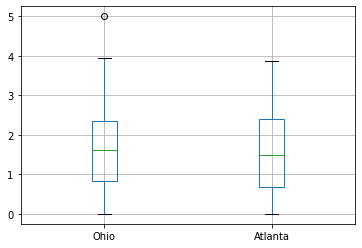

In [22]:
df.boxplot()


nhìn vào biểu đồ trên chúng ta thấy lượng tiêu thụ ở Ohio có nhỉnh hơn Atlanta một chút, và rất khó để kết luận

Tiến hành kiểm định </br> Thực hiện kiểm định giả thuyết so sánh hai mẫu trung bình độc lập gọi a1, a2 lần lượt là lượng tiêu thụ coca trung bình trên đầu người ở Ohio và Atlanta

Giả thuyết không: a1-a2 =0<br>
Giả thuyết đối: a1-a2>0<br>
mức ý nghĩa 5%<br>
Loại kiểm định Independent T test

In [23]:
print (stats.ttest_ind(df.Ohio, df.Atlanta,equal_var=False))


Ttest_indResult(statistic=0.6129544104328379, pvalue=0.5413275550760537)


Chúng ta nhìn thấy rằng: pvalue > 5% rất nhiều nên không đủ cơ sở để bác bỏ giả thuyết không </br> Kết luận: Không đủ căn cứ để kết luận rằng lượng tiêu thụ coca trung bình ở Ohio lớn hơn ở Atlanta